In [1]:
# RFE+colordata

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
data = pd.read_excel("D:\datasss\Colordata.xlsx")
data[:5]

file name   label  encoded_labels    R_1     R_2    R_3  \
0  D:\datass\Active\Q-S1-15.hdr  Active               0    126    1945  25014   
1  D:\datass\Active\Q-S1-16.hdr  Active               0   1834   15115  58309   
2  D:\datass\Active\Q-S1-17.hdr  Active               0    368   12864  49450   
3   D:\datass\Active\Q-S1-2.hdr  Active               0    103     677   2370   
4  D:\datass\Active\Q-S1-23.hdr  Active               0  13228  248924  91947   

      R_4     R_5    R_6     R_7  ...  B_20       M_1       M_2       M_3  \
0  108866  172842  46643    5086  ...     0  0.205908  0.239885  0.250767   
1  110291  110612  49504   11882  ...     2  0.194207  0.175122  0.255664   
2   84185   60236  35879   42177  ...     4  0.248781  0.262103  0.293764   
3   10260   32165  95226  150604  ...     9  0.307837  0.307708  0.374274   
4    5685    1144    349      64  ...   199  0.085660  0.123392  0.111090   

        M_4       M_5       M_6       M_7       M_8       M_9  
0  0.042681  0.048545  0.049631  0.034449  0.031409  0.035673  
1  0.063274  0.053831  0.076648  0.060425  0.061736  0.056302  
2  0.110953  0.122126  0.130736  0.093226  0.099460  0.107497  
3  0.059825  0.057964  0.066559  0.024163  0.045621 -0.045150  
4  0.036515  0.046295  0.041974  0.080235  0.096495  0.092108  

[5 rows x 72 columns]

In [2]:
print("打乱前的数据：")
print(data.head())


seed = 1234


data_s = data.sample(frac=1, random_state=seed).reset_index(drop=True)


print("\n打乱后的数据：")
print(data_s.head())

打乱前的数据：
                      file name   label  encoded_labels    R_1     R_2    R_3  \
0  D:\datass\Active\Q-S1-15.hdr  Active               0    126    1945  25014   
1  D:\datass\Active\Q-S1-16.hdr  Active               0   1834   15115  58309   
2  D:\datass\Active\Q-S1-17.hdr  Active               0    368   12864  49450   
3   D:\datass\Active\Q-S1-2.hdr  Active               0    103     677   2370   
4  D:\datass\Active\Q-S1-23.hdr  Active               0  13228  248924  91947   

      R_4     R_5    R_6     R_7  ...  B_20       M_1       M_2       M_3  \
0  108866  172842  46643    5086  ...     0  0.205908  0.239885  0.250767   
1  110291  110612  49504   11882  ...     2  0.194207  0.175122  0.255664   
2   84185   60236  35879   42177  ...     4  0.248781  0.262103  0.293764   
3   10260   32165  95226  150604  ...     9  0.307837  0.307708  0.374274   
4    5685    1144    349      64  ...   199  0.085660  0.123392  0.111090   

        M_4       M_5       M_6       M_7 

In [3]:
# m * n 
print("数据矩阵 data.shape：",data_s.shape)


features = data_s.iloc[:, 3:].values
labels = data_s.iloc[:, 2].values


scaler = StandardScaler()
featuress = scaler.fit_transform(features)

print(f"X.shape:{features.shape}, y.shape:{labels.shape}")


数据矩阵 data.shape： (206, 72)
X.shape:(206, 69), y.shape:(206,)


Optimal number of features : 11
Ranking of features : [13 24 16 11  1 43 57 30 51 44 10 55 59 38  1 21 33 36 39 32 48  4 22 37
  6 35 15 26  5 49 34 52 58 56 54 50 47 31 18  1  1 40  1 27  9  7 29 45
 25 17  8 42 41 53 46 28 20 19  1 23  1  1  1  2  3  1  1 12 14]


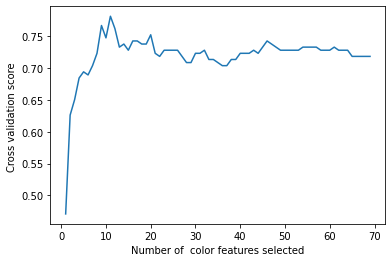

In [4]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y =featuress, labels

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)
print("Ranking of features : %s" % rfecv.ranking_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of  color features selected")
plt.ylabel("Cross validation score ")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [7]:



data = {
    'ID': list(range(1, 70)),
    'Value': [13, 24, 16, 11, 1, 43, 57, 30, 51, 44, 10, 55, 59, 38, 1, 21, 33, 36, 39, 32, 48, 4, 22, 37, 6, 35, 15, 26, 5, 49, 34, 
               52, 58, 56, 54, 50, 47, 31, 18, 1, 1, 40, 1, 27, 9, 7, 29, 45, 25, 17, 8, 42, 41, 53, 46, 28, 20, 19, 1, 23, 1, 1, 1, 2,
               3, 1, 1, 12, 14]
}


df = pd.DataFrame(data)


print(df)

    ID  Value
0    1     13
1    2     24
2    3     16
3    4     11
4    5      1
..  ..    ...
64  65      3
65  66      1
66  67      1
67  68     12
68  69     14

[69 rows x 2 columns]


In [8]:
df.to_excel('Z:/experimentTable/Colorimport.xlsx', index=False)